In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn

In [129]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [130]:
X_train.shape

(50000, 32, 32, 3)

In [131]:
# NO.OF IMAGES , HEIGHT , WIDTH , RGB

In [132]:
X_test.shape

(10000, 32, 32, 3)

In [133]:
 y_train.shape

(50000, 1)

In [134]:
y_test.shape

(10000, 1)

In [135]:
 # visualizing our data

[0]


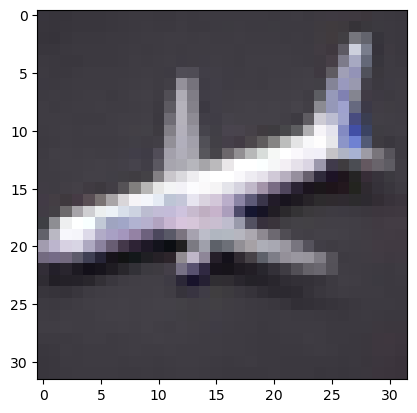

In [136]:
i = 9077
plt.imshow(X_train[i])
print(y_train[i])

In [137]:
#ravel is use to flatten the matrix

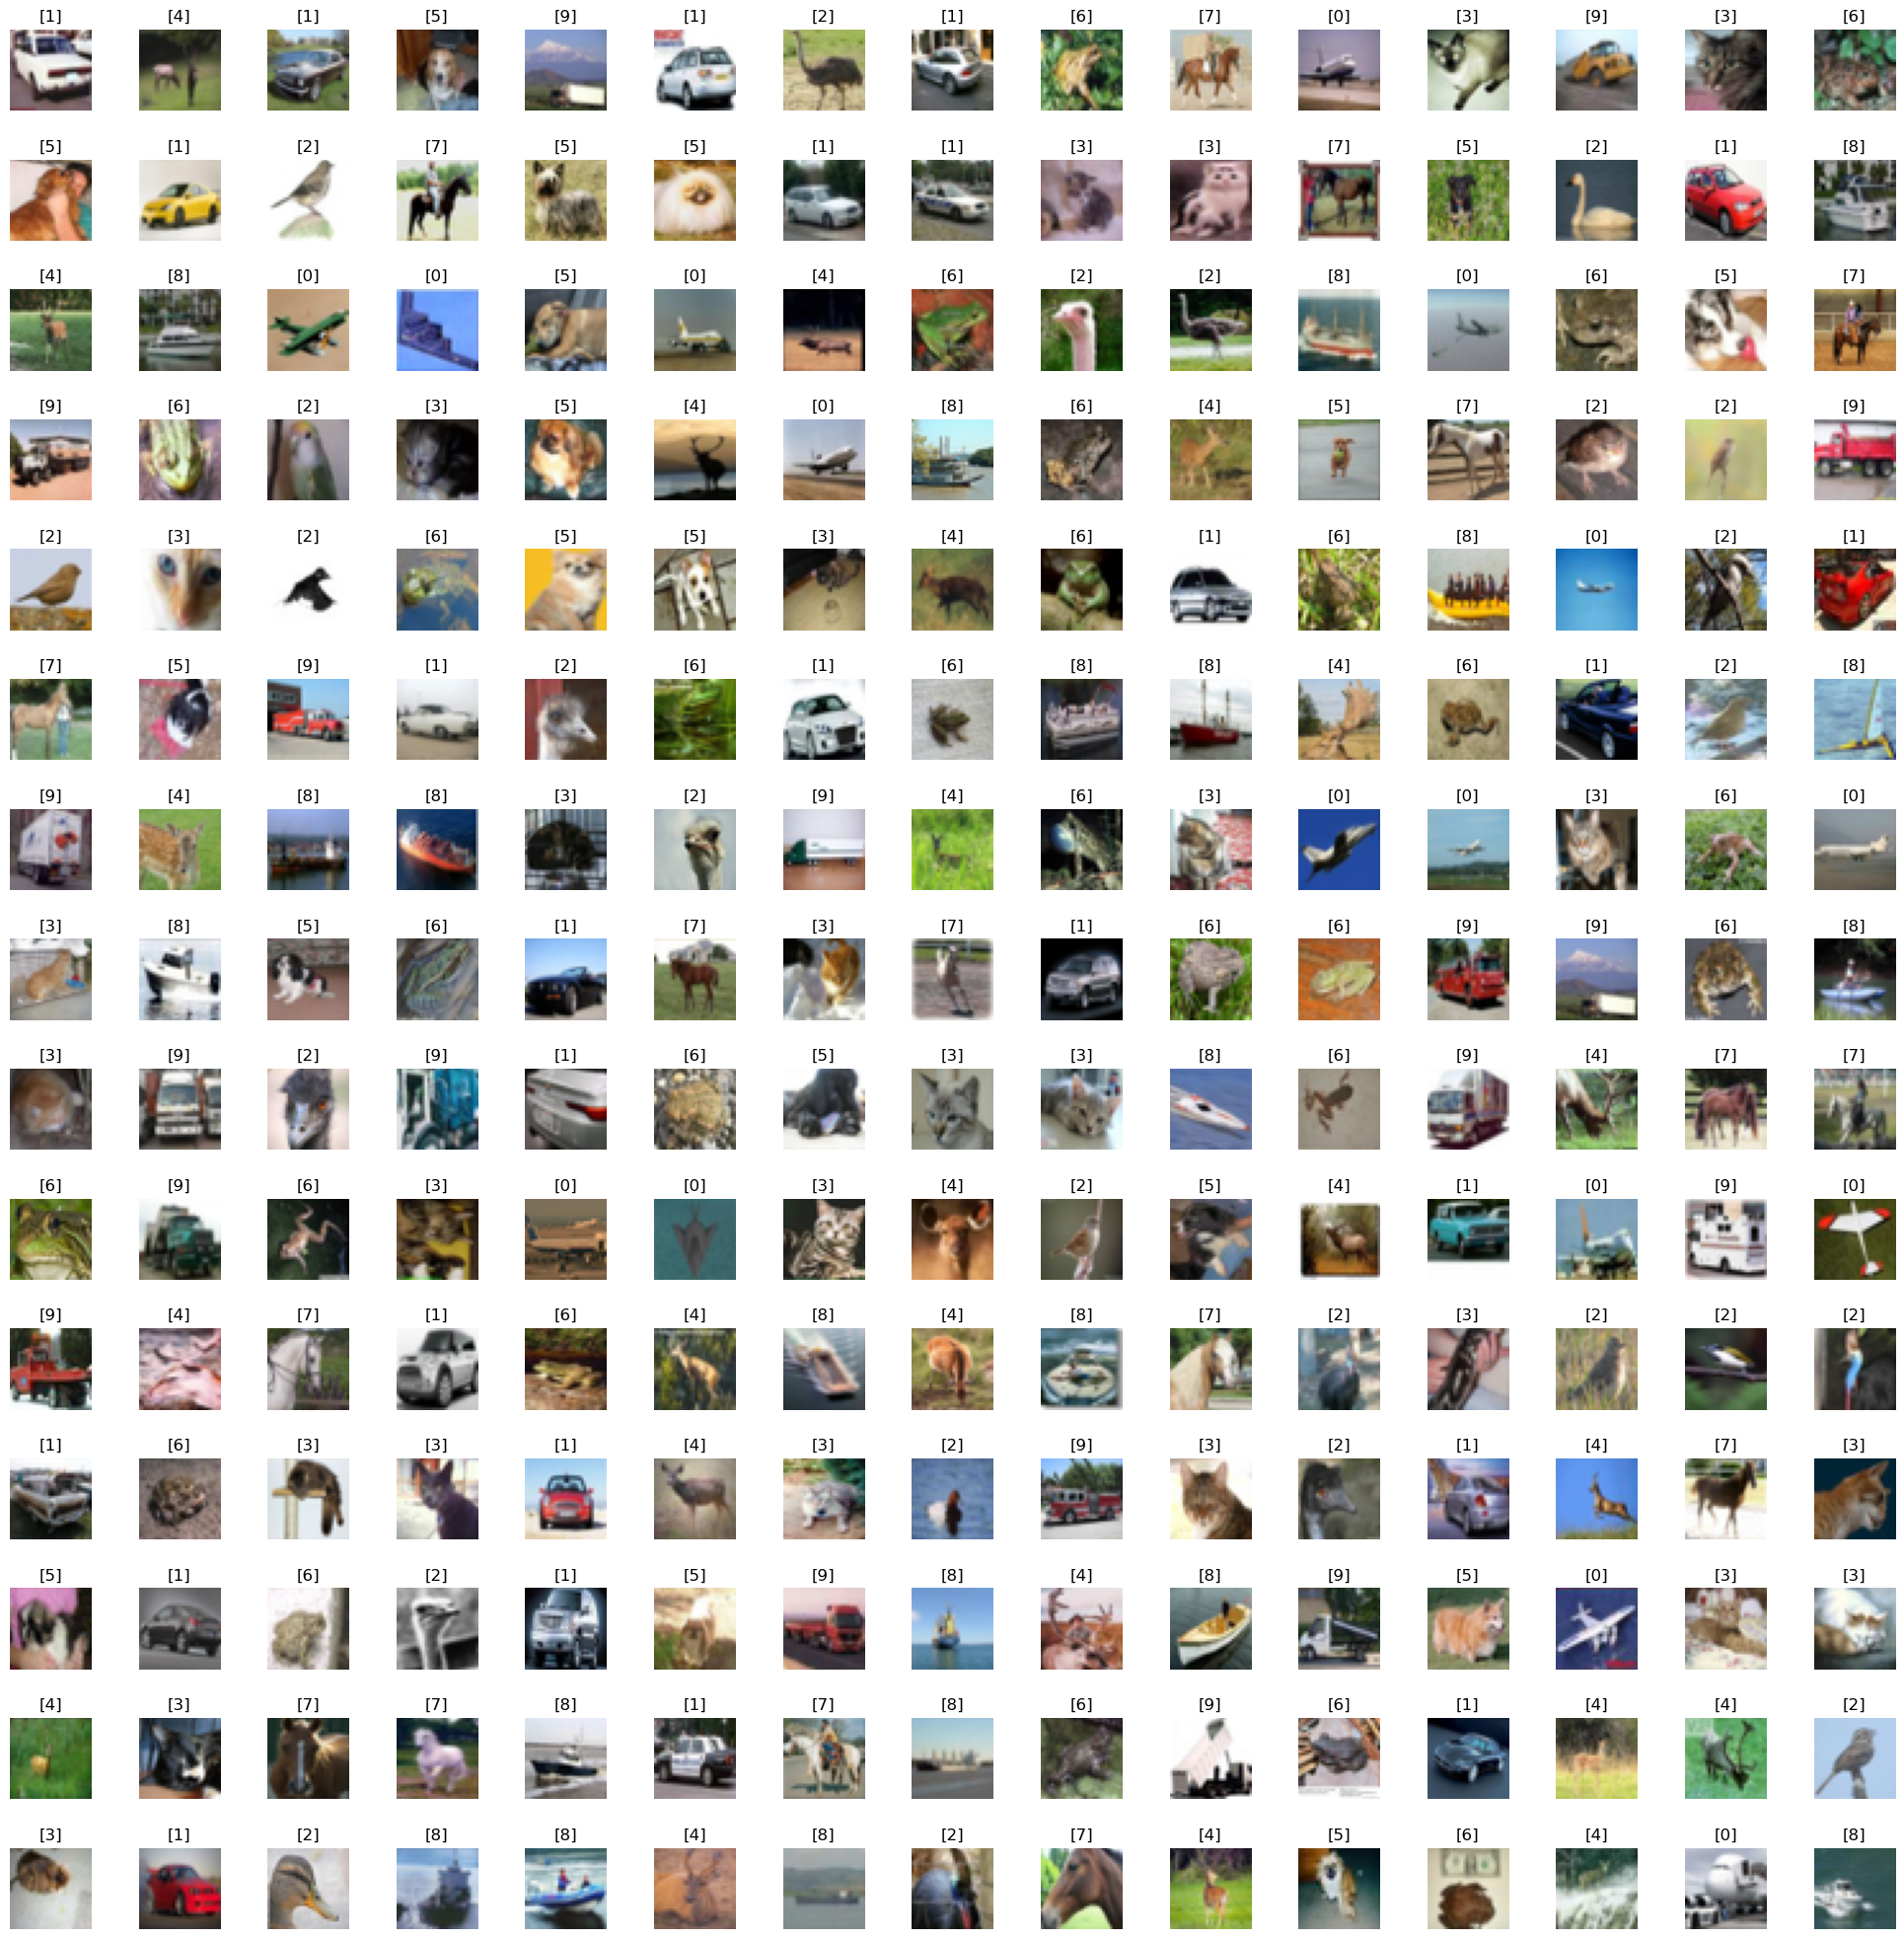

In [138]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid, W_grid , figsize= (25,25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training) # pick a random number
    axes[i].imshow(X_train[index])#plot the image within the x training data that has index , that random index
    axes[i].set_title(y_train[index])
    axes[i].axis('off') # here i remove the representation of axis from all the images
    
plt.subplots_adjust(hspace=0.6) #adjusting the space between images

In [139]:
n_training

50000

In [140]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [141]:
number_cat = 10

In [142]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [143]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [144]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [145]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [146]:
import keras
y_test = keras.utils.to_categorical(y_test,number_cat)

In [147]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [148]:
X_train = X_train/255
X_test = X_test/255
# here we simply normalize it , just  convert it up until 255 , i just wanted to have from 0 to 1.

In [149]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [150]:
X_train.shape

(50000, 32, 32, 3)

In [151]:
Input_shape = X_train.shape[1:]

In [152]:
Input_shape #extract the size of actual input image which is 32 by 32 by 3

(32, 32, 3)

In [153]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense

cnn_model = Sequential()

# First Convolutional Layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
# Second Convolutional Layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout Layer
cnn_model.add(Dropout(0.4))

# Third Convolutional Layer
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# Fourth Convolutional Layer
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# Second Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# Second Dropout Layer
cnn_model.add(Dropout(0.2))

# Flattening Layer
cnn_model.add(Flatten())

# First Dense Layer
cnn_model.add(Dense(units=1024, activation='relu'))
# Second Dense Layer
cnn_model.add(Dense(units=1024, activation='relu'))
# Output Layer
cnn_model.add(Dense(units=10, activation='softmax'))


C:\Users\ark23\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
# now we compile our model then fit # here lr is the learning rate , which represents how fast the network we are going to be trained

In [156]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate  = 0.001 ), metrics=['accuracy'])

In [157]:
history = cnn_model.fit(X_train , y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 64ms/step - accuracy: 0.3199 - loss: 1.8568
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 66ms/step - accuracy: 0.5985 - loss: 1.1406


In [158]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(' Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6543 - loss: 1.0272
 Test Accuracy: 0.6496999859809875


In [159]:
predicted_class = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_class

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [160]:
#1. `cnn_model.predict(X_test)` - This line uses the trained CNN model (`cnn_model`) to make predictions on the input data `X_test`. The `predict` method is used to obtain the model's predictions for the input data.

#2. `np.argmax(..., axis=-1)` - The `np.argmax` function from the NumPy library is used to find the indices of the maximum values along the specified axis. In this case, `axis=-1` indicates that the maximum value is to be found along the last axis. This effectively returns the predicted class for each input in `X_test`.

#3. `predicted_class` - The result of the `np.argmax` operation is assigned to the variable `predicted_class`, which contains the predicted class for each input in `X_test`.

#4. `predicted_class` - Finally, the `predicted_class` variable is displayed, showing the predicted class for each input in `X_test`.

In [161]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [162]:
y_test = y_test.argmax(1)

In [163]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

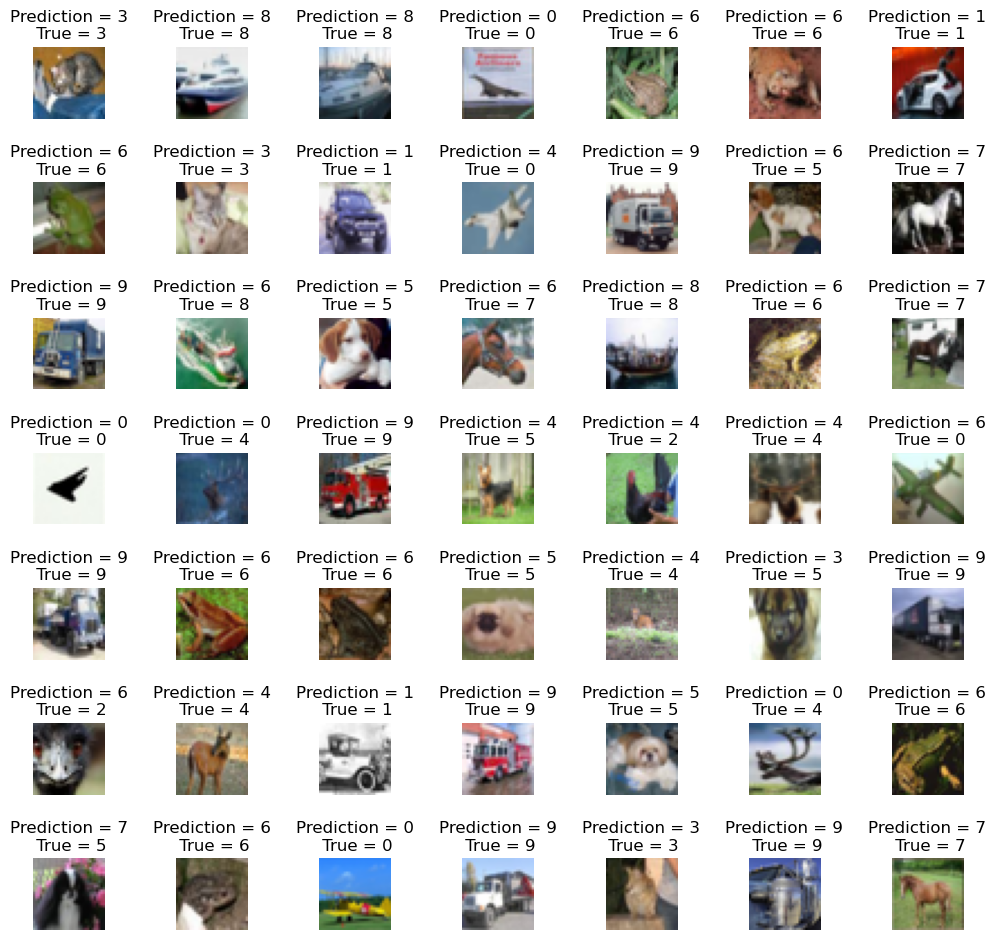

In [164]:
import numpy as np  # Need to import numpy to use np.arange()

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):  # Corrected the function name to np.arange()
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_class[i], y_test[i]))  # Corrected the function name to set_title()
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [165]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

<Axes: >

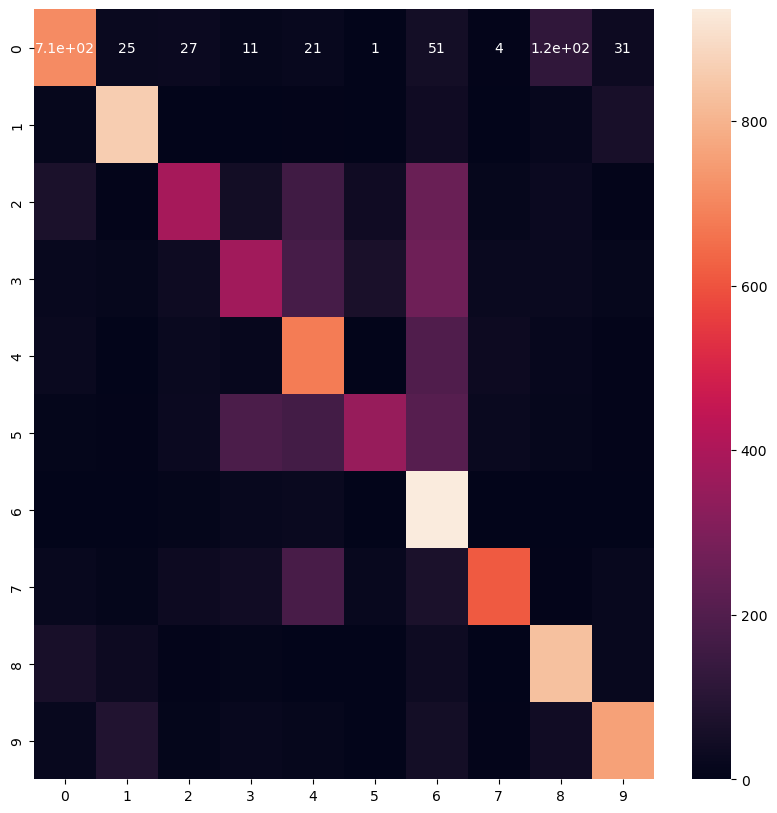

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [167]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_trained_mdoel.h5')
cnn_model.save(model_path)


In [245]:
import keras 
from keras.datasets import cifar10
(X_train , y_train), (X_test , y_test) = cifar10.load_data()

In [246]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [249]:
X_train.shape

(50000, 32, 32, 3)

In [251]:
n = 8
X_train_sample  = X_train[:n]

In [253]:
X_train_sample.shape

(8, 32, 32, 3)

In [255]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

In [257]:
pip install pillow

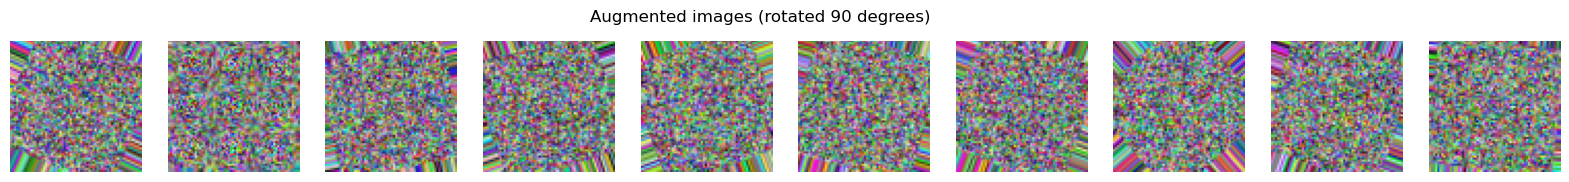

In [266]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train_sample = np.random.rand(10, 64, 64, 3)  

dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

n = 10
fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(x_batch[i])
        ax.axis('off')
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break
